In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('balistic.csv')
# Séparation des caractéristiques et de la cible
X = df[['distance', 'gravitational_force', 'wind_speed', 'wind_direction', 'projectile_mass']]
y = df['hauteur_tir']

In [3]:
# Division du dataset en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


In [5]:
model = Sequential([
    Dense(5, input_shape=(X_train.shape[1],)),
    Dense(64),
    Dense(1)
])
X_train.shape[1]

/opt/homebrew/anaconda3/envs/tf/lib/python3.12/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5

In [6]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [7]:
history = model.fit(X_train, y_train, epochs=35, verbose=1, validation_split=0.2)

Epoch 1/35
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 309us/step - loss: 2498.9658 - val_loss: 488.6974
Epoch 2/35
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 462.9171 - val_loss: 423.5478
Epoch 3/35
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 408.5306 - val_loss: 390.2964
Epoch 4/35
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 367.0297 - val_loss: 356.6549
Epoch 5/35
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - loss: 335.3716 - val_loss: 306.2167
Epoch 6/35
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 292.4889 - val_loss: 293.7076
Epoch 7/35
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 256.8081 - val_loss: 230.7453
Epoch 8/35
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 211.4468 - val_loss: 182.0282
Epoch 9/35
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 169.8699 - val_loss: 134.9213
Epoch 10/35
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 123.1429 - val_loss: 88.3076
Epoch 11/35
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step - loss: 2.4518
Test Loss: 2.475843667984009


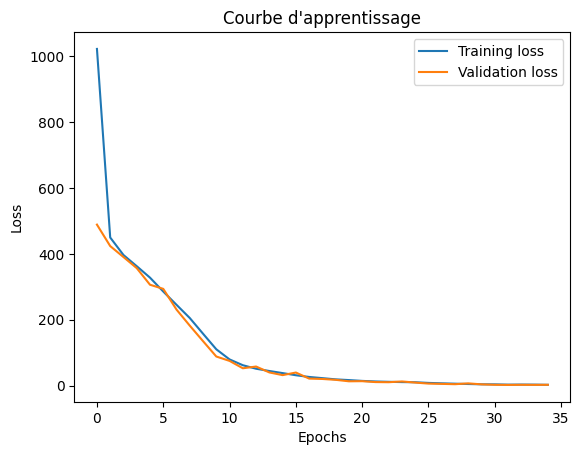

In [8]:
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Visualisation de la courbe d'apprentissage
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Courbe d\'apprentissage')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()